## `Assignment~2`
> ### Adarsha Mondal
> ### MDS202205
> ### adarsha@cmi.ac.in

$Utilization = \dfrac{Octet\_diff \times 8}{1024^2 \times Timespan}$

#### Units
1. $Octet\_diff$ : B
2. $Utilization$ : Mbps
3. $Timespan = datetime_i - datetime_{i-1}$ : s

##### Dependencies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import random
from datetime import datetime

sns.set_style("darkgrid")

##### Import excel data into Pandas Dataframe

In [2]:
excel_filename = "Fablink-cleanedup.xlsx"
xls = pd.ExcelFile(excel_filename)
print(xls.sheet_names)

['Fab1001-401', 'Fab1002-401']


In [3]:
dfs = {}
for i, sheet in enumerate(xls.sheet_names):
    dfs[i] = pd.read_excel('Fablink-cleanedup.xlsx', sheet_name=sheet)
    print(f'Columns in sheet name {sheet} are : {list(dfs[i].columns)}')

Columns in sheet name Fab1001-401 are : ['source_node', 'source_port', 'source_type', 'operSpeed', 'destination_node', 'destination_port', 'destination_type', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'datetime', 'Unnamed: 12']
Columns in sheet name Fab1002-401 are : [1002, ' 1/1 ', 'spine', '40G', 401, ' 1/50 ', 'leaf', 1294836545844876, 1288534668453794, 6301877391082, 556.4757975014934, datetime.datetime(2022, 5, 13, 19, 7, 34)]


### First Dataframe

In [4]:
dfs[0].head()

,source_node,source_port,source_type,operSpeed,destination_node,destination_port,destination_type,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,datetime,Unnamed: 12
0,1001,1/1,spine,40G,401,1/49,leaf,864504425592799,859365645174667,5138780418132,453.770639,2022-05-13 19:07:34,453.770639
1,1001,1/1,spine,40G,401,1/49,leaf,869309684178755,864504425592799,4805258585956,424.319602,2022-05-14 19:07:27,424.319602
2,1001,1/1,spine,40G,401,1/49,leaf,874373310562711,869309684178755,5063626383956,447.134299,2022-05-15 19:08:04,447.134299
3,1001,1/1,spine,40G,401,1/49,leaf,879933845908609,874373310562711,5560535345898,491.012939,2022-05-16 19:08:05,491.012939
4,1001,1/1,spine,40G,401,1/49,leaf,885694021578201,879933845908609,5760175669592,508.641814,2022-05-17 19:08:27,508.641814


##### `Fab1001-401` has same columns, *`Unnamed: 10`* & *`Unnamed: 12`*
> Need to drop *`Unnamed: 12`* column

In [5]:
dfs[0].columns

Index(['source_node', 'source_port', 'source_type', 'operSpeed',
       'destination_node', 'destination_port', 'destination_type',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'datetime',
       'Unnamed: 12'],
      dtype='object')

In [6]:
dfs[0] = dfs[0].drop(columns=['Unnamed: 12'])

##### From previous assignment we know *`Unnamed: 10`* column is actually *`Utilization`*
> Need to rename *`Unnamed: 10`* column

In [7]:
dfs[0].rename(columns={'Unnamed: 10':'utilization'}, inplace=True)

In [8]:
dfs[0].columns

Index(['source_node', 'source_port', 'source_type', 'operSpeed',
       'destination_node', 'destination_port', 'destination_type',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'utilization', 'datetime'],
      dtype='object')

### Second Dataframe

In [9]:
dfs[1].head()

,1002,1/1,spine,40G,401,1/50,leaf,1294836545844876,1288534668453794,6301877391082,556.4757975014934,2022-05-13 19:07:34
0,1002,1/1,spine,40G,401,1/50,leaf,1300783379663988,1294836545844876,5946833819112,525.124322,2022-05-14 19:07:27
1,1002,1/1,spine,40G,401,1/50,leaf,1305281270436508,1300783379663988,4497890772520,397.178047,2022-05-15 19:08:04
2,1002,1/1,spine,40G,401,1/50,leaf,1310806346359800,1305281270436508,5525075923292,487.881760,2022-05-16 19:08:05
3,1002,1/1,spine,40G,401,1/50,leaf,1316036666713584,1310806346359800,5230320353784,461.853906,2022-05-17 19:08:27
4,1002,1/1,spine,40G,401,1/50,leaf,1322295480586478,1316036666713584,6258813872894,552.673152,2022-05-18 19:07:28


##### Second dataset has set its first row as its column names
- Have to extract the column names and inject it into actual dataframe instances
- Rename second dataset column names similar to first dataset

In [10]:
extracted_row = dfs[1].columns
dfs[1].columns = dfs[0].columns

In [11]:
dfs[1].columns

Index(['source_node', 'source_port', 'source_type', 'operSpeed',
       'destination_node', 'destination_port', 'destination_type',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'utilization', 'datetime'],
      dtype='object')

In [12]:
dfs[1] = pd.concat([dfs[1], pd.DataFrame([extracted_row],columns=dfs[0].columns)], ignore_index=True)

In [13]:
dfs[1].head()

,source_node,source_port,source_type,operSpeed,destination_node,destination_port,destination_type,Unnamed: 7,Unnamed: 8,Unnamed: 9,utilization,datetime
0,1002,1/1,spine,40G,401,1/50,leaf,1300783379663988,1294836545844876,5946833819112,525.124322,2022-05-14 19:07:27
1,1002,1/1,spine,40G,401,1/50,leaf,1305281270436508,1300783379663988,4497890772520,397.178047,2022-05-15 19:08:04
2,1002,1/1,spine,40G,401,1/50,leaf,1310806346359800,1305281270436508,5525075923292,487.881760,2022-05-16 19:08:05
3,1002,1/1,spine,40G,401,1/50,leaf,1316036666713584,1310806346359800,5230320353784,461.853906,2022-05-17 19:08:27
4,1002,1/1,spine,40G,401,1/50,leaf,1322295480586478,1316036666713584,6258813872894,552.673152,2022-05-18 19:07:28


In [14]:
dfs[0].shape, dfs[1].shape

((70, 12), (70, 12))

#### Data Exploration

Merge both dataframe into one

In [15]:
df = pd.concat([dfs[0], dfs[1]], ignore_index=True)

In [16]:
records, fields = df.shape
print(f'The dataset has {records} rows and {fields} columns. And the columns are:')
print(df.dtypes)

The dataset has 140 rows and 12 columns. And the columns are:
source_node                  int64
source_port                 object
source_type                 object
operSpeed                   object
destination_node             int64
destination_port            object
destination_type            object
Unnamed: 7                   int64
Unnamed: 8                   int64
Unnamed: 9                   int64
utilization                float64
datetime            datetime64[ns]
dtype: object


In [17]:
print(f'Unique source nodes are {df.source_node.unique()}. And unique destination nodes are {df.destination_node.unique()}')

Unique source nodes are [1001 1002]. And unique destination nodes are [401]


In [18]:
print(f'Maximum utilization of any link in the given data is {round(df.utilization.max(),2)} Mbps and that is {round(df.utilization.max()/400,2)}% of the bandwidth.')

Maximum utilization of any link in the given data is 1135.44 Mbps and that is 2.84% of the bandwidth.


##### All the bi-rectional and uni-directional nodes

In [19]:
all_links = df[['source_node','destination_node']].drop_duplicates()
all_links = [(row.source_node, row.destination_node) for index, row in all_links.iterrows()]

In [20]:
print(f'Number of total links: {len(all_links)} {all_links}')

Number of total links: 2 [(1001, 401), (1002, 401)]


##### **Analysis**

In [21]:
df['link'] = df.source_node.astype(str) +', '+ df.destination_node.astype(str)

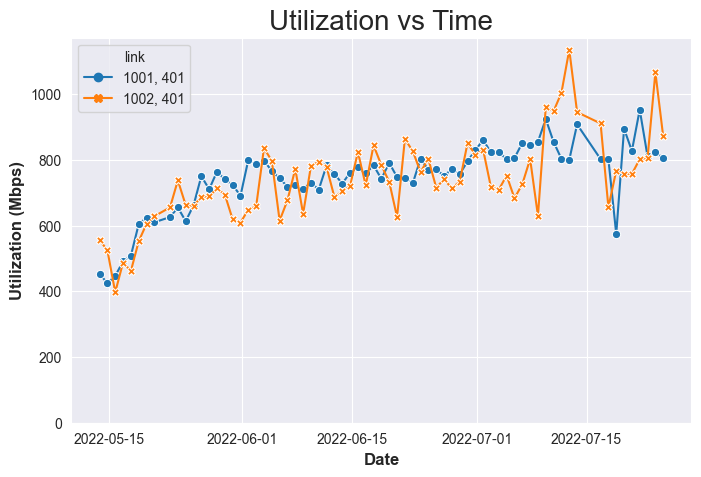

In [22]:
plt.figure(figsize=(8,5))
sns.lineplot(
    data=df,
    x="datetime", y="utilization", hue="link", style="link",
    markers=True, dashes=False
)
plt.title('Utilization vs Time', fontsize=20)
plt.ylabel('Utilization (Mbps)', fontsize=12, fontweight="bold")
plt.xlabel('Date', fontsize=12, fontweight="bold")
plt.ylim(0)
plt.show()

## Utilization over Time for both Links
- 1001,401 (Dataset - 1)
- 1002,401 (Dataset - 2)

`datetime` format is not supported by Seaborn Regression plot. Therefore, it has to be converted into `float` first and then fit into the model.

Also, the Y-axis (*`utilization`*) starts from 0.

In [23]:
df['float_time'] = df.datetime.apply(lambda x: x.timestamp())

In [24]:
parameters = pd.DataFrame(columns=['link','beta0 (intercept)', 'beta1 (slope)', 'R', 'SSE'])

In [25]:
parameters

,link,beta0 (intercept),beta1 (slope),R,SSE


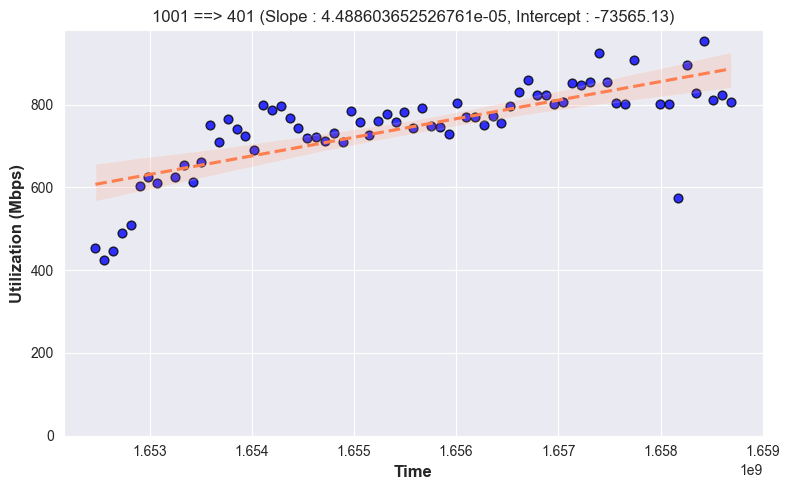

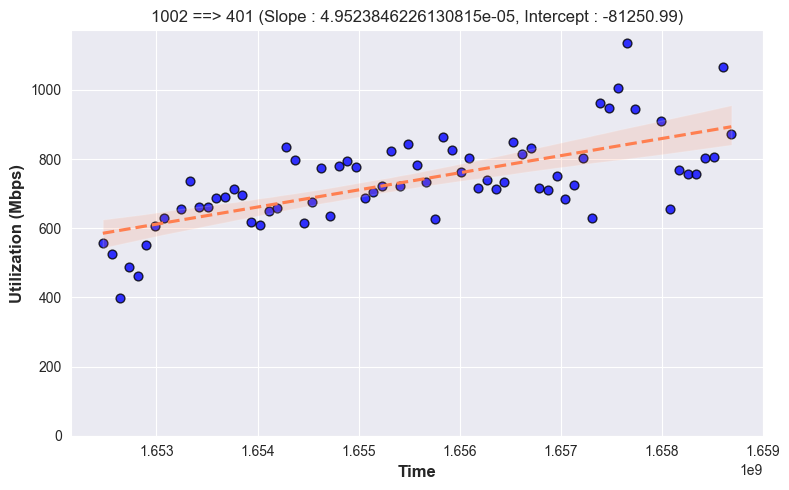

In [26]:
for i, node in enumerate(df.source_node.unique()):
    df_filtered = df[df.source_node==node]
    plt.figure(figsize=(8,5))
    sns.regplot(
        data=df_filtered,
        x="float_time", y="utilization",fit_reg = True,
    line_kws = {'label': 'Regression line', 'linestyle': '--', 'color': 'coral'}, 
    scatter_kws ={'s':40, 'color': 'blue', 'edgecolors': 'black'}
    )

    # Get the regression parameters (slope and intercept)
    y = np.array(df_filtered.utilization.values)
    x = np.array(df_filtered.float_time.values).reshape(-1,1)
    
    model = LinearRegression()
    model.fit(x,y)
    slope = model.coef_[0]
    intercept = round(model.intercept_,2)

    y_pred = model.predict(x)

    # Calculate Pearson correlation coefficient (R)
    R = np.corrcoef(y,y_pred)[0,1]

    # Calculate the Mean Squared Error (MSE)
    mse = mean_squared_error(y, y_pred)

    # Calculate the SSE
    sse = mse * len(y)

    parameters.loc[i] = [f'{node},401', slope, intercept, R, round(sse,2)]


    plt.title(f'{node} ==> 401 (Slope : {slope}, Intercept : {intercept})', fontsize=12)
    plt.ylabel('Utilization (Mbps)', fontsize=12, fontweight="bold")
    plt.xlabel('Time', fontsize=12, fontweight="bold")
    plt.ylim(0)

    plt.tight_layout()
    plt.show()

### Parameters of each link

In [27]:
parameters

,link,beta0 (intercept),beta1 (slope),R,SSE
0,"1001,401",0.000045,-73565.13,0.752802,347436.08
1,"1002,401",0.000050,-81250.99,0.686660,620047.65
